In [1]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import pyplot
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import ParameterGrid
from sklearn import metrics
from datetime import datetime
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

C:\Users\Miral\anaconda3\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.1)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [2]:
google_df = pd.read_csv("Resources/Google.csv")
Amazon_df = pd.read_csv("Resources/Amazon.csv")
Facebook_df = pd.read_csv("Resources/Facebook.csv")
Apple_df = pd.read_csv("Resources/Apple.csv")
Microsoft_df = pd.read_csv("Resources/Microsoft.csv")
Netflix_df = pd.read_csv("Resources/Netflix.csv")
Tesla_df = pd.read_csv("Resources/Tesla.csv")

In [3]:
google_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       252 non-null    object 
 1   Open       252 non-null    float64
 2   High       252 non-null    float64
 3   Low        252 non-null    float64
 4   Close      252 non-null    float64
 5   Adj Close  252 non-null    float64
 6   Volume     252 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 13.9+ KB


In [4]:
# Use pandas.to_datetime() to convert string to datetime format
google_df["Date"] = pd.to_datetime(google_df["Date"])

In [5]:
google_df = google_df.set_index('Date')
google_df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-24 00:00:00-05:00,125.977997,131.203003,124.500000,130.804001,130.804001,76622000
2022-01-25 00:00:00-05:00,128.740005,129.399002,126.500504,126.934998,126.934998,46960000
2022-01-26 00:00:00-05:00,131.119003,133.000000,127.141998,129.233002,129.233002,49130000
2022-01-27 00:00:00-05:00,131.304001,132.652496,128.932495,129.005005,129.005005,31950000
2022-01-28 00:00:00-05:00,129.658997,133.356506,128.485001,133.350998,133.350998,34362000


In [6]:
# Moving Average : a moving average (rolling average or running average) is a calculation to analyze data points by 
#creating a series of averages of different subsets of the full data set.
# here we are taking number of days for calculation of MA

ma_days  = [10,50,100]

for ma in ma_days:
    column_name = f"MA for {ma} days"
    google_df[column_name] = google_df["Adj Close"].rolling(ma).mean()
    

In [7]:
google_df.head(25)

,Open,High,Low,Close,Adj Close,Volume,MA for 10 days,MA for 50 days,MA for 100 days
Date,,,,,,,,,
2022-01-24 00:00:00-05:00,125.977997,131.203003,124.500000,130.804001,130.804001,76622000,NaN,NaN,NaN
2022-01-25 00:00:00-05:00,128.740005,129.399002,126.500504,126.934998,126.934998,46960000,NaN,NaN,NaN
2022-01-26 00:00:00-05:00,131.119003,133.000000,127.141998,129.233002,129.233002,49130000,NaN,NaN,NaN
2022-01-27 00:00:00-05:00,131.304001,132.652496,128.932495,129.005005,129.005005,31950000,NaN,NaN,NaN
2022-01-28 00:00:00-05:00,129.658997,133.356506,128.485001,133.350998,133.350998,34362000,NaN,NaN,NaN
2022-01-31 00:00:00-05:00,134.162003,135.473007,132.209503,135.303497,135.303497,39986000,NaN,NaN,NaN
2022-02-01 00:00:00-05:00,137.594498,137.792999,134.368500,137.643997,137.643997,68644000,NaN,NaN,NaN
2022-02-02 00:00:00-05:00,151.250000,151.546494,145.522507,148.000000,148.000000,123200000,NaN,NaN,NaN
2022-02-03 00:00:00-05:00,145.705505,149.675003,142.665497,143.089996,143.089996,71518000,NaN,NaN,NaN


In [8]:
google_df['5d_future_close'] = google_df['Adj Close'].shift(-5)
google_df['5d_close_future_pct'] = google_df['5d_future_close'].pct_change(5)

In [9]:
google_df.dropna(inplace=True)
y = google_df['5d_close_future_pct']
X = google_df.drop(['5d_close_future_pct'],axis=1)

In [10]:
from sklearn.model_selection import train_test_split
from collections import Counter
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=1)

# Random forest Regressor

In [11]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor()

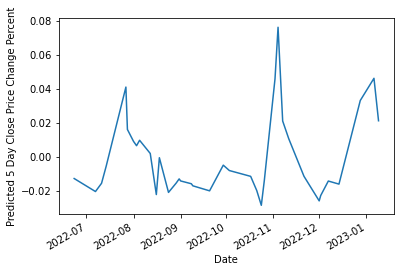

In [31]:
rf_model = RandomForestRegressor(n_estimators=300, max_depth=3, max_features=4, random_state=42)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)
y_test_series = pd.Series(y_test,index=y_test.index)
y_pred_series = pd.Series(y_pred, index=y_test.index)
y_pred_series.plot()
plt.ylabel("Predicted 5 Day Close Price Change Percent")
plt.show()

In [13]:
rf_model.score(X_test,y_test)

0.4856529386049998

In [14]:
# model evaluation
print(
  'mean_squared_error : ', mean_squared_error(y_test, y_pred))
print(
  'mean_absolute_error : ', mean_absolute_error(y_test, y_pred))

mean_squared_error :  0.0011963337248587446
mean_absolute_error :  0.02959100913500605


# Linear Regression

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn import preprocessing

In [16]:
# creating a regression model
model = LinearRegression()

In [17]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=1)

In [18]:
X_train.shape

(111, 10)

In [19]:
X_test.shape

(37, 10)

In [20]:
# fitting the model
model.fit(X_train,y_train)

LinearRegression()

In [21]:
# making predictions
y_pred = model.predict(X_test)

In [22]:
model.score(X_test,y_test)

0.9876295632757309

In [23]:
# model evaluation
print(
  'mean_squared_error : ', mean_squared_error(y_test, y_pred))
print(
  'mean_absolute_error : ', mean_absolute_error(y_test, y_pred))

mean_squared_error :  2.8772732956490916e-05
mean_absolute_error :  0.004170461135915213
